**POLYNOMIAL REGRESSION**

Importing Modules


In [29]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

CREATED VERY USEFUL FUNCTIONS

In [25]:
#mean normalizes the matrix and adds ones at the end
def mscale(mat):
    mmean= np.mean(mat,axis=0)
    mstddev=np.std(mat,axis=0)
    p= (mat-mmean)/mstddev
    m=mat[:,0].size
    u=np.ones((m,1))
    return np.concatenate((u,p),axis=1)

# reverses the mean normalization done above   
def mdesacle(original_mat,mat):
    mmean= np.mean(original_mat,axis=0)
    mstddev=np.std(original_mat,axis=0)
    return ((mat)*mstddev)+mmean


# reverses the mean normalization done on vector
def vdescale(original_vect, vect):
    vmean= np.mean(original_vect)
    vstddev=np.std(original_vect)
    return (vect*vstddev)+vmean

# finds average, range and mean normaloizes vector
def average(v):                                    #made nice functions for the use of average and range finding
    s=sum(v)
    m=v.size
    return s/m
def rangee(v):
    r=v.max()-v.min()
    return r

def scale(v):
    avg=average(v)
    r=np.std(v)             
    u=np.ones(m).reshape(m,1)
    f=(u*avg)
    scaled= (v-f)*(1/r)
    return scaled

#
def degree_1(initial_matrix, matrix , list_of_degree):
    global X
    for i in list_of_degree:
        X=np.concatenate((initial_matrix,matrix**i),axis=1)
        initial_matrix=X
       


    
def degree_2(matrix):
    m,n=matrix.shape
    P=np.hsplit(matrix,n)
    for i in range(n):
        for j in range(i,n):
            matrix=np.concatenate((matrix,(P[i])*(P[j])),axis=1)
    return matrix
            
def degree_3(latest_matrix,initial_matrix):
    m,n=initial_matrix.shape
    P=np.hsplit(initial_matrix,n)
    for i in range(n):
        for j in range(i,n):
            for z in range(j,n):
                latest_matrix=np.concatenate((latest_matrix,P[i]*P[j]*P[z]),axis=1)
    return latest_matrix
                
def degree_4(latest_matrix,initial_matrix):
    m,n=initial_matrix.shape
    P=np.hsplit(initial_matrix,n)
    for i in range(n):
        for j in range(n):
            for z in range(n):
                for k in range (n):
                    latest_matrix=np.concatenate((latest_matrix,P[i]*P[j]*P[z]*P[k]),axis=1)

                    
# def degree_compiled (listOfDegrees, initmat):
#     for i in list_of_degree:
#         if i==2:
#             degree_2(mat)
#         if i==3:
#             degree_3(mat)
#         if i==4:
#             degree_4(mat)
            
        

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**extracting the data**

In [5]:
s=input("enter the file dorectory/ name if in the same directory")
print("uploading a  csv file that is appropriate for linear regression.......")

X=pd.read_csv(s)   #load the training data

# n=int(input("enter the number of features....."))

X=X.to_numpy()    #converting to numpy
i=len(X[0])       #finding the number of features
m=X[:,0].size   
y=X[:,i-1].reshape((m,1))
X=np.delete(X,i-1,axis=1) 
n=i-1                       #n is number of features
u=np.ones((m,1))            #vector of ones then p.


enter the file dorectory/ name if in the same directory/content/drive/MyDrive/woc/datasets/Polynomial_train.csv
uploading a  csv file that is appropriate for linear regression.......


MAEN NORMALIZING

In [6]:
X_degree2=degree_2(X)
X_final=degree_3(X_degree2,X)
X_final=mscale(X_final)
y_scaled=scale(y)

**GRADIENT DESCENT**

[0.4047174]
[0.327605]
[0.26519294]
[0.2146763]
[0.17378653]
[0.14068828]
[0.1138964]
[0.09220901]
[0.07465336]
[0.06044213]
[0.04893807]
[0.03962537]
[0.03208651]
[0.02598357]
[0.02104296]
[0.01704328]
[0.01380527]
[0.01118385]
[0.00906156]
[0.00734335]
[0.00595225]
[0.00482595]
[0.00391404]
[0.00317567]
[0.00257782]
[0.00209372]
[0.00170171]
[0.00138426]
[0.00112717]
[0.00091897]
[0.00075033]
[0.00061374]
[0.00050309]
[0.00041345]
[0.00034082]
[0.00028197]
[0.00023427]
[0.00019561]
[0.00016426]
[0.00013884]
[0.00011822]
[0.00010149]
[8.7903518e-05]
[7.68734935e-05]
[6.79115336e-05]
[6.06255277e-05]
[5.4697909e-05]
[4.98714707e-05]
[4.59378804e-05]
[4.27283824e-05]
[4.01062692e-05]
[3.79607859e-05]
[3.62021949e-05]
[3.47577799e-05]
[3.356861e-05]
[3.25869197e-05]
[3.17739874e-05]
[3.10984171e-05]
[3.05347477e-05]
[3.00623259e-05]
[2.96643938e-05]
[2.93273504e-05]
[2.90401524e-05]
[2.87938301e-05]
[2.85810943e-05]
[2.83960186e-05]
[2.82337814e-05]
[2.80904573e-05]
[2.79628478e-05]
[2.7

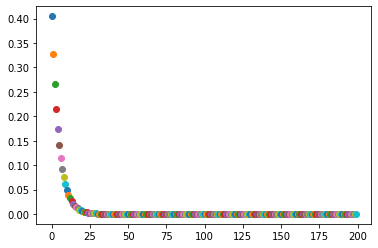

In [12]:
#initialise theta value to zero initially
# theta=np.zeros((n,1))
m,n=X_final.shape
theta=(np.zeros((n,1)))
h_x=X_final@theta
error=(h_x-y_scaled)
j= (1/2)*(1/m)*(sum((error)**2))
alpha=0.1

for i in range (200):
    grad=alpha*(1/m)*(X_final.T@error)
    theta=theta-grad
    h_x=np.dot(X_final,theta)
    error=(h_x-y_scaled)
    j= (1/2)*(1/m)*(sum((error)**2))
    print(j)
    plt.scatter(i,j)


WE have got the optimal value of theta


In [27]:
theta

array([[-9.00917674e-17],
       [-7.49759170e-03],
       [-7.65651121e-04],
       [ 9.16140840e-05],
       [ 2.56735930e-02],
       [-8.84843628e-01],
       [-3.87907581e-01],
       [-1.24105028e-01],
       [ 1.94582620e-01],
       [ 9.89500554e-02],
       [ 1.00961047e-02],
       [ 1.01174652e-03],
       [-8.27476200e-04],
       [-2.25558859e-04],
       [-1.23907658e-04],
       [-3.15018894e-04],
       [-6.98906256e-05],
       [ 6.17417307e-05],
       [ 8.59718967e-05],
       [ 4.64933109e-04]])

**import the test files**

In [17]:
s=input("enter the file dorectory/ name if in the same directory")
print("uploading a  csv file that is appropriate for linear regression.......")

X=pd.read_csv(s)   #load the training data

# n=int(input("enter the number of features....."))

X=X.to_numpy()    #converting to numpy
i=len(X[0])       #finding the number of features
m=X[:,0].size   
y=X[:,i-1].reshape((m,1))
X=np.delete(X,i-1,axis=1) 
n=i-1                       #n is number of features
u=np.ones((m,1))            #vector of ones then p.


enter the file dorectory/ name if in the same directory/content/drive/MyDrive/woc/datasets/Polynomial_test.csv
uploading a  csv file that is appropriate for linear regression.......


MEAN NORMALIZING THE TEST DATA

In [18]:
X_test2=degree_2(X)
X_test_final=degree_3(X_test2,X)
X_scaled=mscale(X_test_final)
y_predict=mdesacle((X_scaled@theta),y)

**THE PREDICTION VALUE**

In [24]:
y_predict

array([[ -658.98885081],
       [ -546.45673397],
       [  -75.19475457],
       ...,
       [-1775.19529667],
       [  -22.79256038],
       [  -64.98356707]])

In [26]:
y

array([[ -657.6693095 ],
       [ -545.3625239 ],
       [  -75.04418664],
       ...,
       [-1771.640694  ],
       [  -22.74692118],
       [  -64.85344575]])

In [30]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [31]:
print((np.sum(a)**2)/6)
print((np.sum(a**2))/6)

73.5
15.166666666666666
